<a href="https://colab.research.google.com/github/KU-ZHANGZIYUE/RainfallForecasting_ConvEncDec/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Convolutional Encoder Decoder Model
#Author: ZHANG Ziyue (Kyoto University)
#Date: 2011/11/3

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Research/Prepared_Data

Mounted at /content/drive/
/content/drive/MyDrive/Research/Prepared_Data


In [ ]:
import numpy as np
import os
from keras.models import Model,Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, UpSampling2D, Activation,ZeroPadding2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


In [ ]:
def model():
    
    seq = Sequential()

    #Encoder
    seq.add(Convolution2D(filters=64,kernel_size=(3,3),input_shape = (180, 120, 3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2,2)))

    seq.add(Convolution2D(filters=128,kernel_size=(3,3),padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2,2)))

    seq.add(Convolution2D(filters=256,kernel_size=(3,3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(MaxPooling2D(pool_size=(2,2)))
    
    seq.add(Convolution2D(filters=512,kernel_size=(3,3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))

    #Decoder
    seq.add(Convolution2D(filters=512,kernel_size=(3,3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(UpSampling2D((2,2)))

    seq.add(Convolution2D(filters=256,kernel_size=(3,3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(UpSampling2D((2,2)))

    seq.add(ZeroPadding2D(padding=(1,0))) 
    seq.add(Convolution2D(filters=128,kernel_size=(3,3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(UpSampling2D((2,2)))

    seq.add(Convolution2D(filters=64,kernel_size=(3,3), padding = 'same'))
    seq.add(BatchNormalization())
    seq.add(Activation('relu'))
    seq.add(Convolution2D(filters=1,kernel_size=(3, 3), padding = 'same'))


    opt = optimizers.Adam(lr= 0.001)
    seq.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

    # Train the network
    input = np.load('./input.npy')
    output = np.load('./output.npy')
    input = input/10   ###
    output = output/10  ###
    result = seq.fit(input, output, batch_size=8, epochs=50, validation_split=0.2) #val may be 20%
    seq.save('result.h5')

    return result
    
if __name__ == '__main__':
    result = model()

#然后validation改成20%，这个意思就是这最后20不会被用来traintrain
#然后挑选"validation"也就是最后20%的data中的几个sample，plot出来input，prediction和ground truth

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 180, 120, 64)      1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 180, 120, 64)      256       
_________________________________________________________________
activation_8 (Activation)    (None, 180, 120, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 60, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 60, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 90, 60, 128)       512       
_________________________________________________________________
activation_9 (Activation)    (None, 90, 60, 128)      

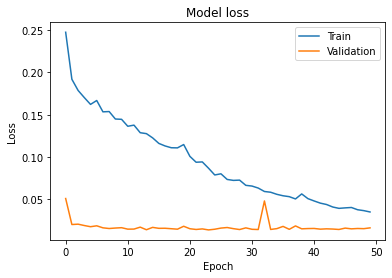

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.ylim(-0.2, 0.4)
plt.show()

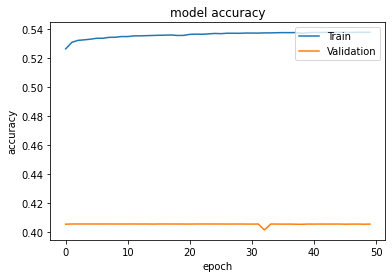

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()